## negative graph

1. import full directed network: article_neg1.gml
2. save as undirected network: u_neg.gml

- save u_nodes_neg.csv
- save u_Gc_negative.gml
- save u_Gc_nodes_neg.csv

# 1.

In [1]:
# 1_network_df

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from glob import glob

plt.style.use('ggplot')
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

gml_files = glob('../output/network/article_neg1.gml')

In [2]:
def calculate_graph_inf(graph):
    graph.name = filename
    info = nx.info(graph)
    print info

def highest_centrality(cent_dict):
    """Returns a tuple (node,value) with the node
    with largest value from centrality dictionary."""
    # create ordered tuple of centrality data
    cent_items = [(b,a) for (a,b) in cent_dict.iteritems()]
    # sort in descending order
    cent_items.sort()
    cent_items.reverse()
    return tuple(reversed(cent_items[0]))

---
# 2. convert to undirected

In [3]:
for graph_num, gml_graph in enumerate(gml_files):
    dgraph = nx.read_gml(gml_graph)
    ugraph = dgraph.to_undirected() # to undirected graph
    U = dgraph.to_undirected(reciprocal=True)
    e = U.edges()
    ugraph.add_edges_from(e)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(dgraph)
    calculate_graph_inf(ugraph)

----------
../output/network/article_neg1.gml
Name: article_neg1.gml
Type: MultiDiGraph
Number of nodes: 1257
Number of edges: 1898
Average in degree:   1.5099
Average out degree:   1.5099
Name: article_neg1.gml
Type: MultiGraph
Number of nodes: 1257
Number of edges: 1898
Average degree:   3.0199


In [4]:
# save undirected gml
#nx.write_gml(ugraph, "../output/network/u_neg.gml")

dgraph = directed
ugraph = undirected

# undirected graph

In [5]:
# load
gml_files = glob('../output/network/u_neg.gml')

In [6]:
# ugraph = undirected; dgraph = directed
for graph_num, gml_graph in enumerate(gml_files):
    ugraph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(ugraph)

----------
../output/network/u_neg.gml
Name: u_neg.gml
Type: MultiGraph
Number of nodes: 1257
Number of edges: 1898
Average degree:   3.0199


---
# 3. all nodes table

In [7]:
# 2_node_df: list all nodes and centrality
data_columns = ['name',
                'sentiment'
                ]
data = pd.DataFrame(columns = data_columns)
combined_df = pd.DataFrame()

In [8]:
# calculate variables and save into list
sent = "negative"    
deg_cent = nx.degree_centrality(ugraph)
bet_cent = nx.betweenness_centrality(ugraph)
clo_cent = nx.closeness_centrality(ugraph)
graph_values = {'name':filename,
                'sentiment':sent
                }
data = data.append(graph_values, ignore_index=True)

degree = nx.degree(ugraph)
deg_df = pd.DataFrame.from_dict(degree, orient = 'index')
deg_df.columns = ['degree']

# degree centrality
deg_cent = nx.degree_centrality(ugraph)
dc_df = pd.DataFrame.from_dict(deg_cent, orient = 'index')
dc_df.columns = ['deg cent']

# betweenness centrality
bet_cent = nx.betweenness_centrality(ugraph)
bc_df = pd.DataFrame.from_dict(bet_cent, orient = 'index')
bc_df.columns = ['bet cent']

# closeness centrality
clo_cent = nx.closeness_centrality(ugraph)
cc_df = pd.DataFrame.from_dict(clo_cent, orient = 'index')
cc_df.columns = ['clo cent']

# concat node frames into node_df
frames = [deg_df, dc_df, bc_df, cc_df]
node_df = pd.concat(frames, axis = 1)
node_df.index.name = 'node'
node_df = node_df.reset_index()

values = pd.DataFrame(graph_values, columns = ('name', 'sentiment'), index = [0])

# df = merges graph_values with node_df for single graph and fill NaNs
df = pd.concat([values, node_df], axis = 1)
df = df.fillna(method='ffill')
combined_df = combined_df.append(df)

In [9]:
# print entire network
combined_df

,name,sentiment,node,degree,deg cent,bet cent,clo cent
0,u_neg.gml,negative,ACIP,1,0.000796,0.000000e+00,0.149349
1,u_neg.gml,negative,ACIP's rotavirus use recommendation,1,0.000796,0.000000e+00,0.187493
2,u_neg.gml,negative,ADHD,1,0.000796,0.000000e+00,0.228872
3,u_neg.gml,negative,AIDS,1,0.000796,0.000000e+00,0.177383
4,u_neg.gml,negative,African American males,2,0.001592,0.000000e+00,0.222944
5,u_neg.gml,negative,African women,3,0.002389,2.158333e-03,0.241219
6,u_neg.gml,negative,African-American children,1,0.000796,0.000000e+00,0.206704
7,u_neg.gml,negative,Alysia Osoff,6,0.004777,5.157534e-03,0.190783
8,u_neg.gml,negative,America,2,0.001592,2.885274e-03,0.166489
9,u_neg.gml,negative,American Academy of Pediatrics,2,0.001592,4.519712e-04,0.234217


In [10]:
# save
#combined_df.to_csv('../output/df/u_nodes_neg.csv')

---
# 4. Draw undirected and directed network

In [11]:
# 7_graph_calculation
def drawIt(graph, what = 'graph'):
    nsize = graph.number_of_nodes()
    print "Drawing %s of size %s:" % (what, nsize)
    
    if nsize > 20:
        plt.figure(figsize=(10, 10))
        if nsize > 40:
            nx.draw_spring(graph, with_labels = True, node_size = 70, font_size = 12)
        else:
            nx.draw_spring(graph, with_labels = True)
    else:
        nx.draw_spring(graph, with_labels = True)
    plt.show()

# for undirected graphs
def describeGraph(graph):
    components = sorted(nx.connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s edges, %s nodes, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')

# for directed graphs
def describeGraph_d(graph):
    components = sorted(nx.weakly_connected_components(graph), key = len, reverse = True)
    cc = [len(c) for c in components]
    subgraphs = list(nx.weakly_connected_component_subgraphs(graph))
    params = (graph.number_of_edges(),graph.number_of_nodes(),len(cc))
    print "Graph has %s edges, %s nodes, %s connected components\n" % params
    drawIt(graph)
    for sub in components:
        drawIt(graph.subgraph(sub), what = 'component')


Graph has 1898 edges, 1257 nodes, 49 connected components

Drawing graph of size 1257:


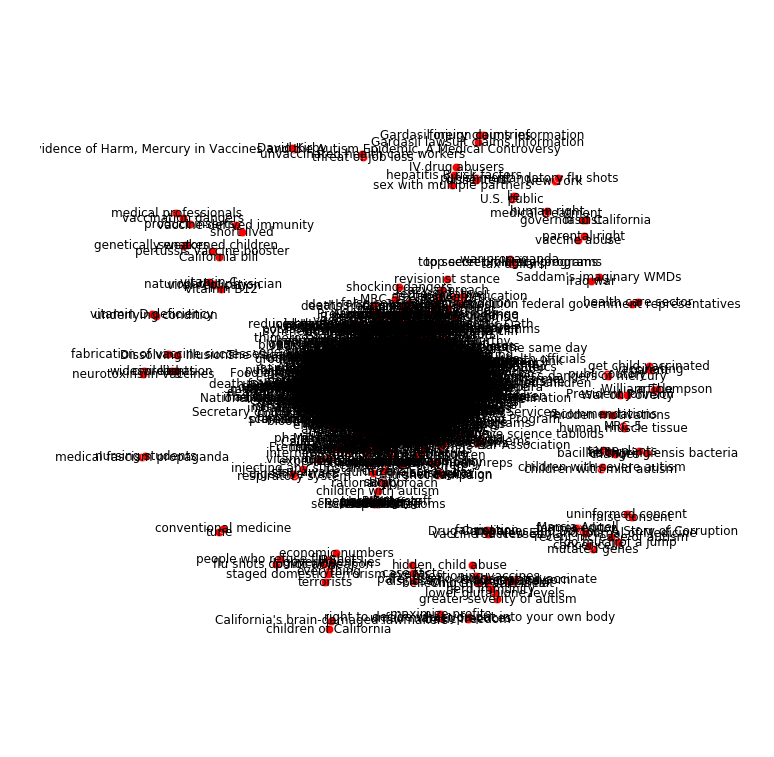

Drawing component of size 1140:


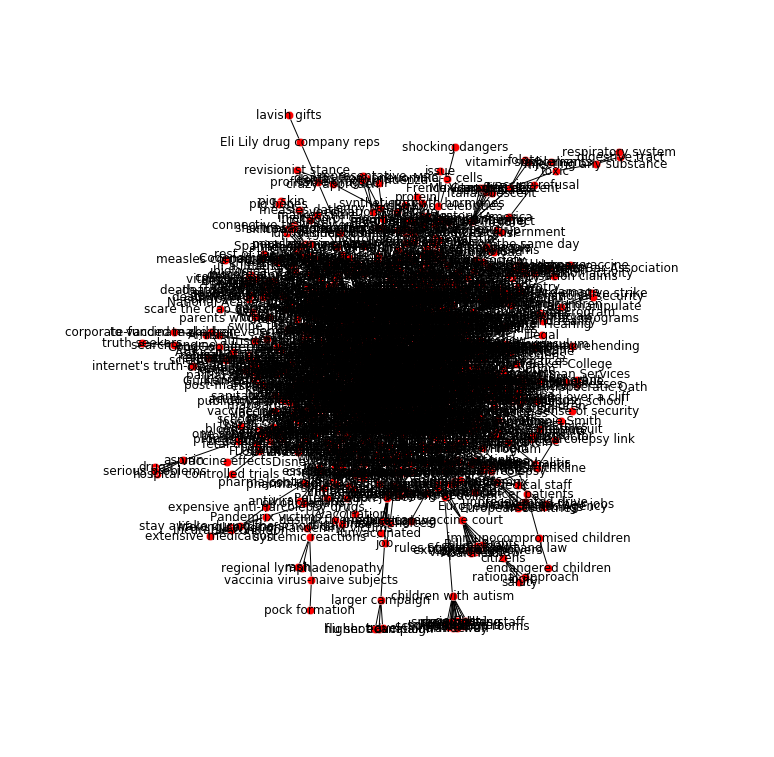

Drawing component of size 7:


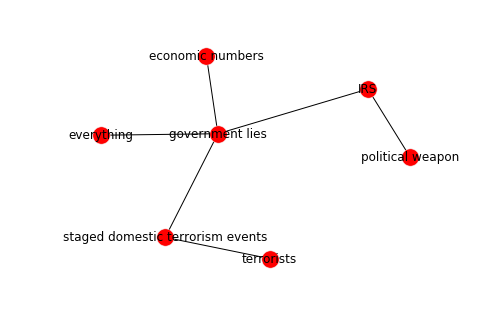

Drawing component of size 4:


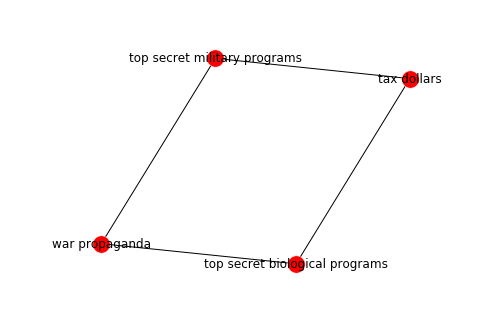

Drawing component of size 4:


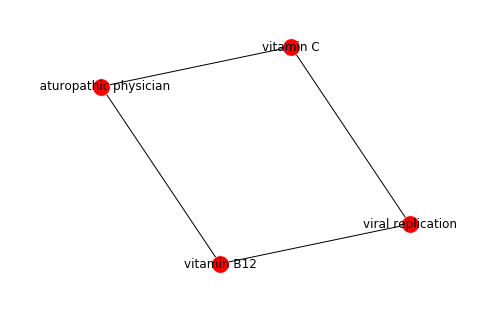

Drawing component of size 4:


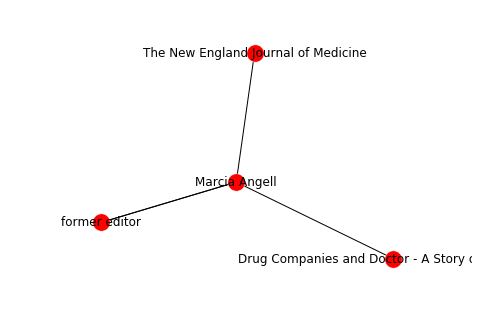

Drawing component of size 3:


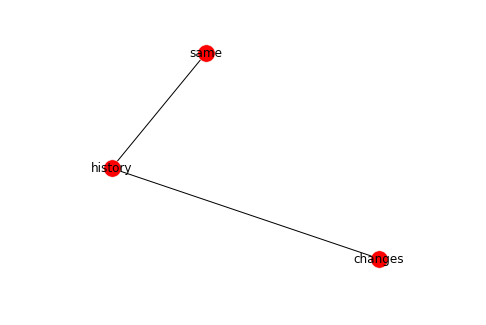

Drawing component of size 3:


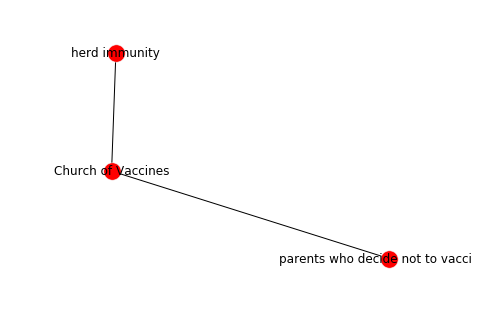

Drawing component of size 3:


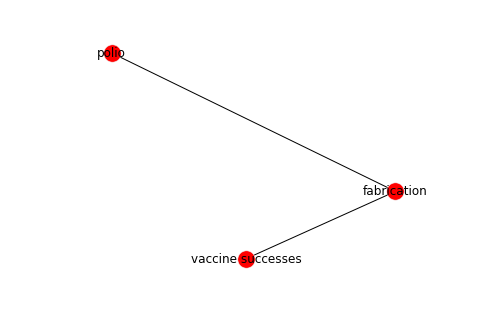

Drawing component of size 3:


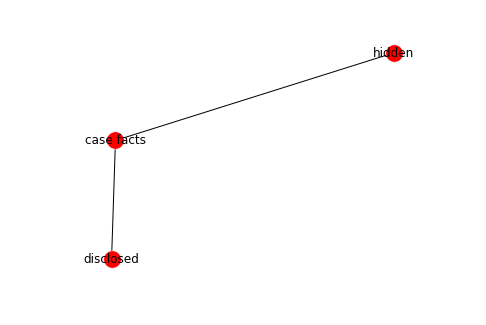

Drawing component of size 3:


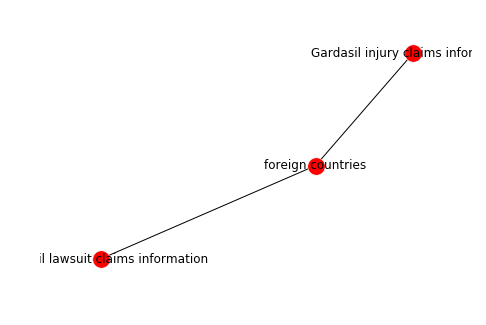

Drawing component of size 3:


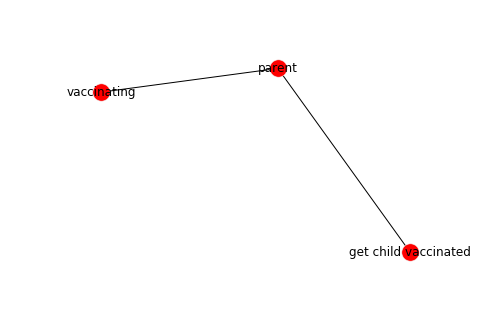

Drawing component of size 3:


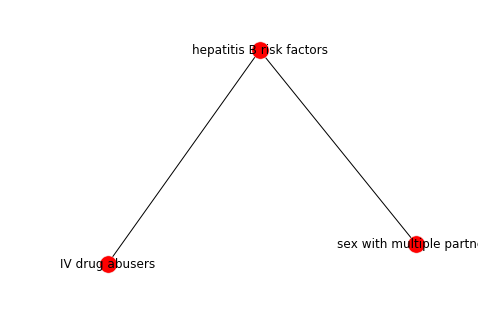

Drawing component of size 3:


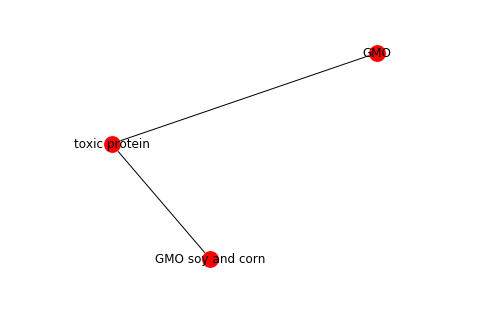

Drawing component of size 3:


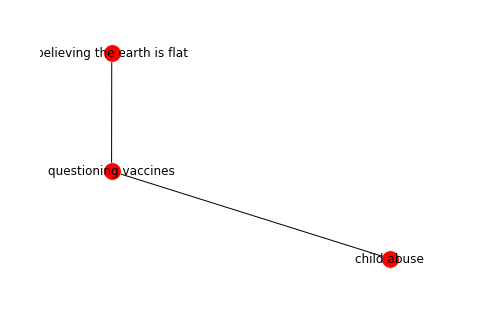

Drawing component of size 3:


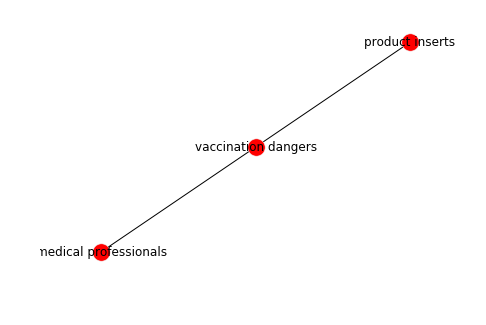

Drawing component of size 2:


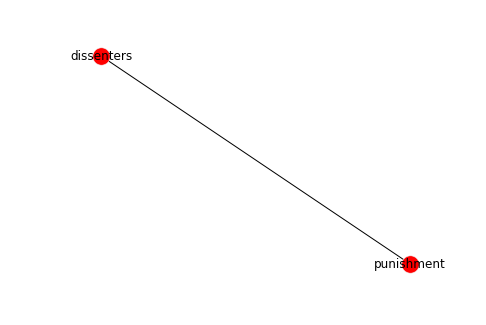

Drawing component of size 2:


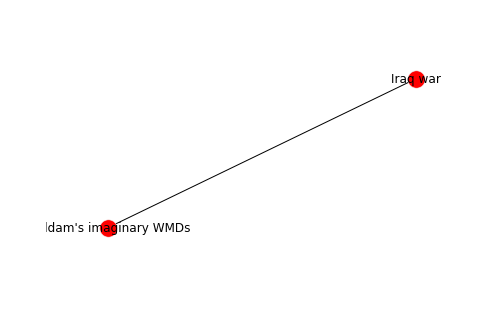

Drawing component of size 2:


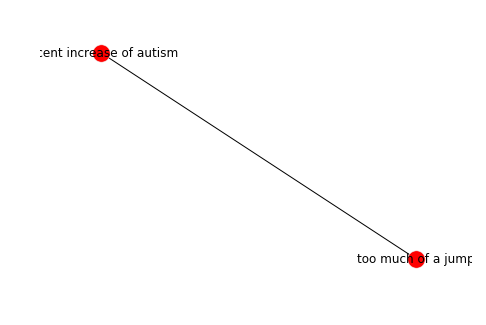

Drawing component of size 2:


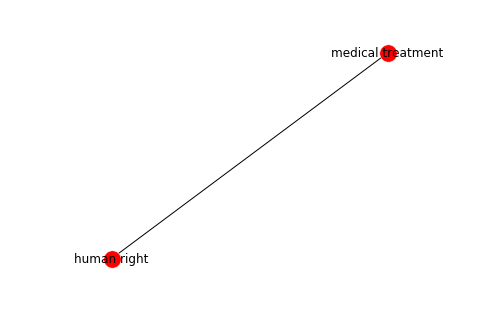

Drawing component of size 2:


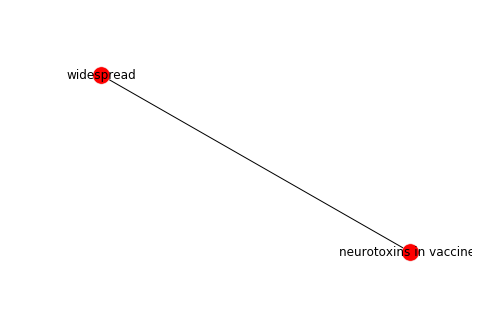

Drawing component of size 2:


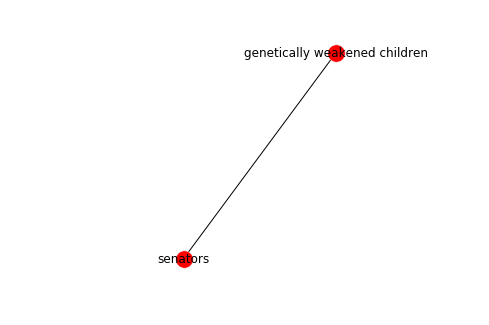

Drawing component of size 2:


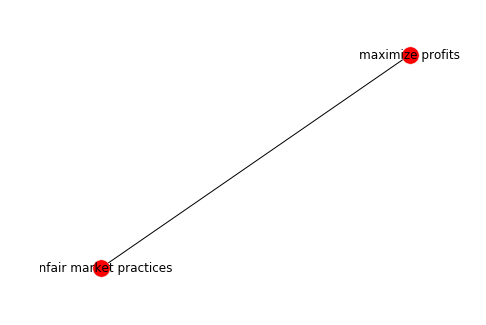

Drawing component of size 2:


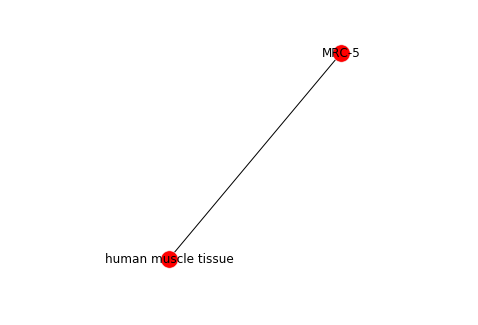

Drawing component of size 2:


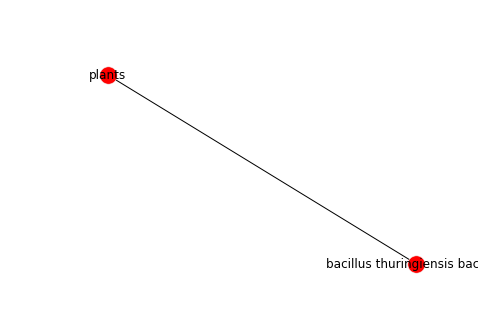

Drawing component of size 2:


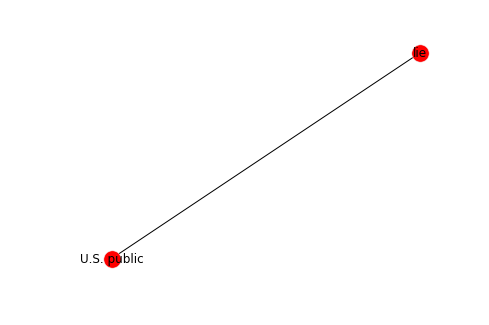

Drawing component of size 2:


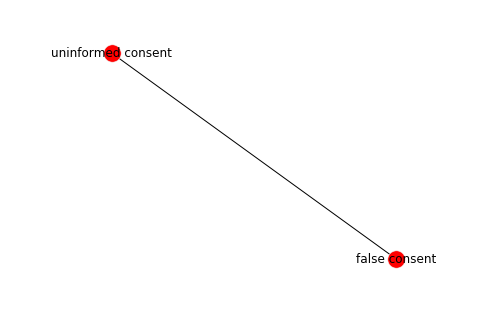

Drawing component of size 2:


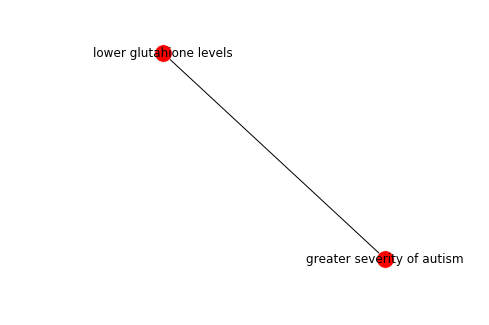

Drawing component of size 2:


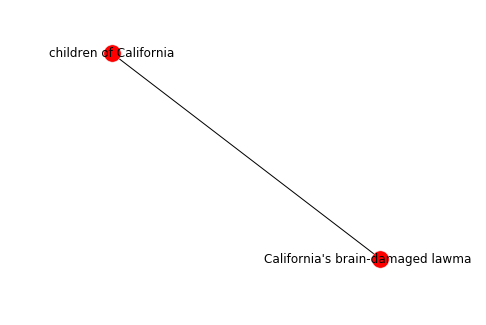

Drawing component of size 2:


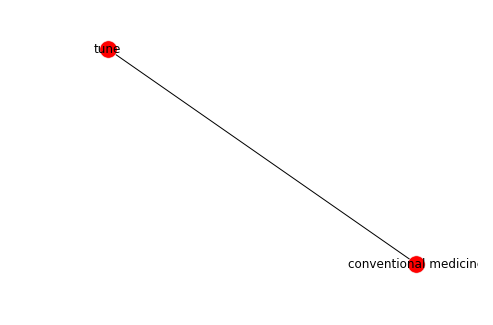

Drawing component of size 2:


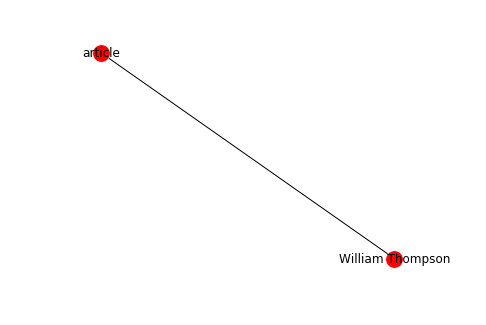

Drawing component of size 2:


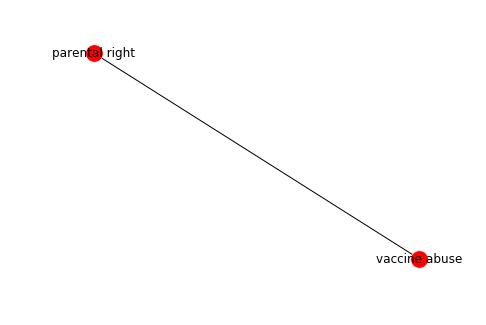

Drawing component of size 2:


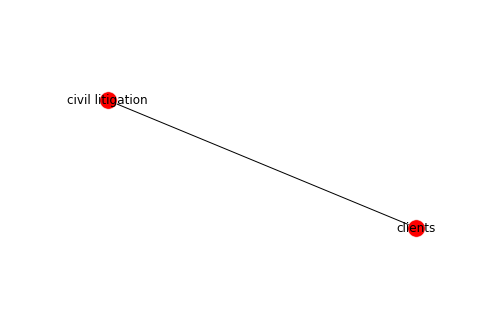

Drawing component of size 2:


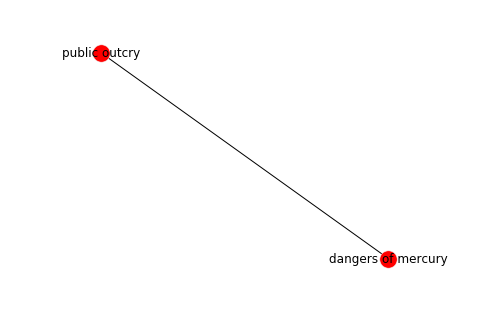

Drawing component of size 2:


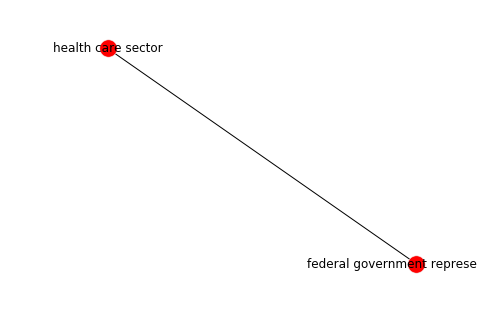

Drawing component of size 2:


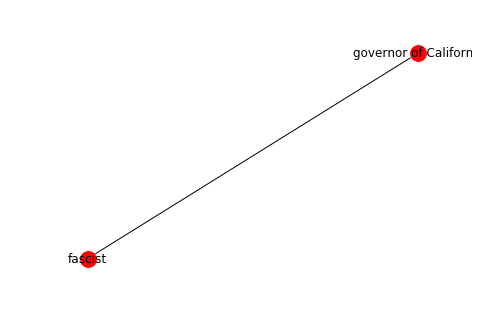

Drawing component of size 2:


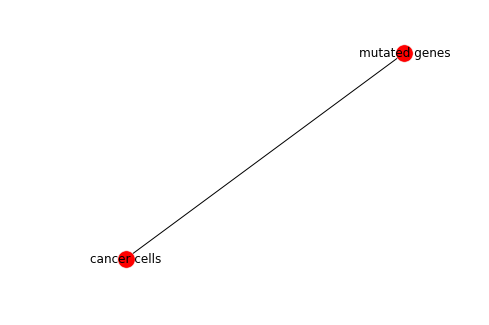

Drawing component of size 2:


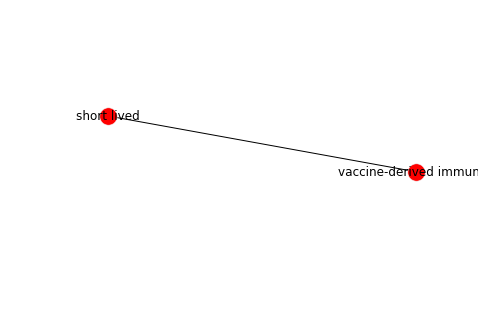

Drawing component of size 2:


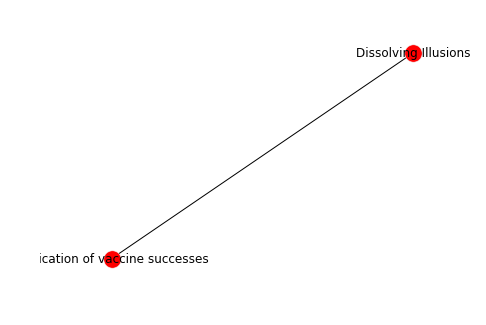

Drawing component of size 2:


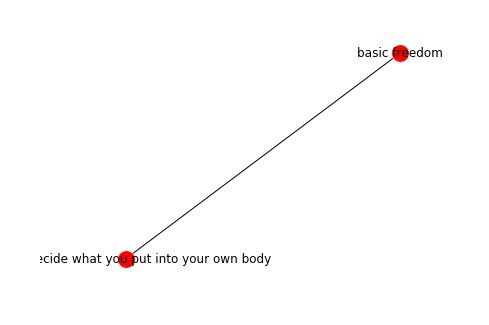

Drawing component of size 2:


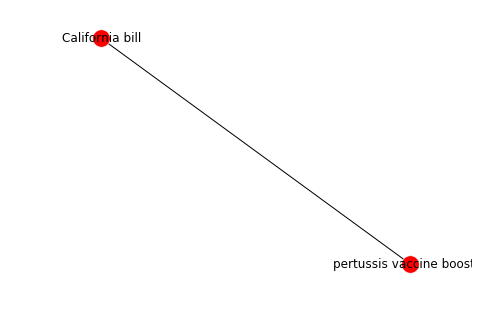

Drawing component of size 2:


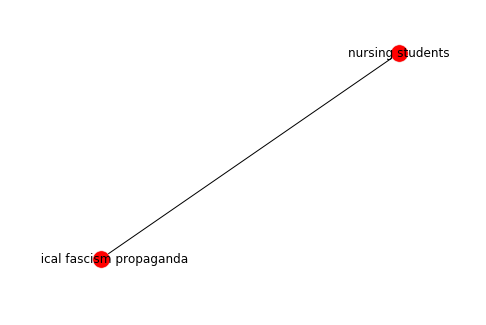

Drawing component of size 2:


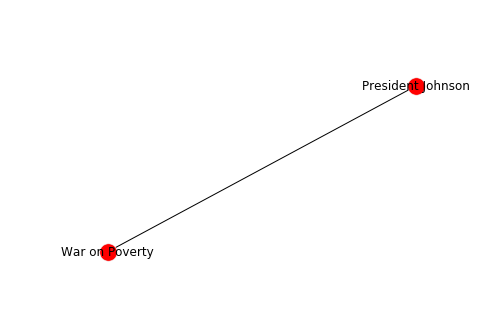

Drawing component of size 2:


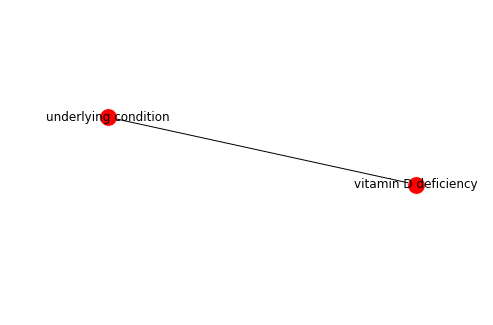

Drawing component of size 2:


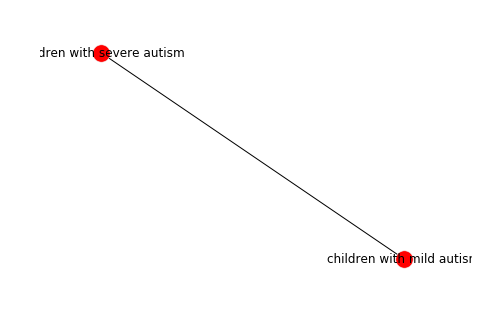

Drawing component of size 2:


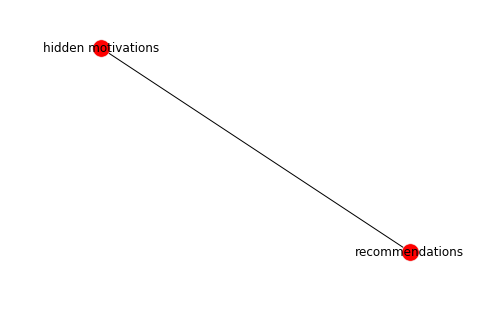

Drawing component of size 2:


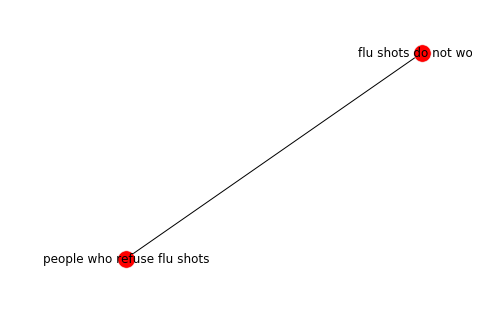

Drawing component of size 2:


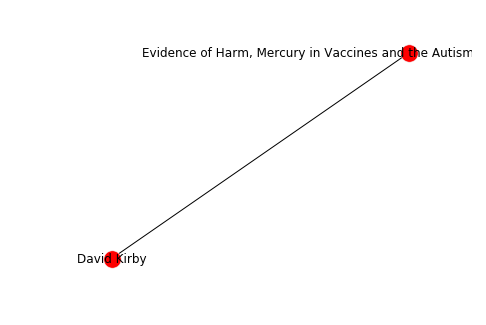

Drawing component of size 2:


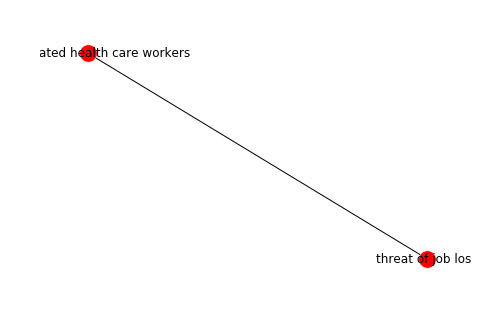

Drawing component of size 2:


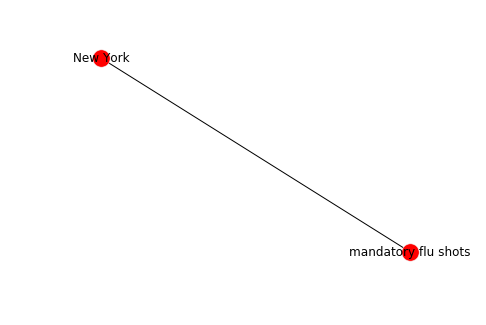

In [12]:
# UNDIRECTED network graph
describeGraph(ugraph)

Graph has 1898 edges, 1257 nodes, 49 connected components

Drawing graph of size 1257:


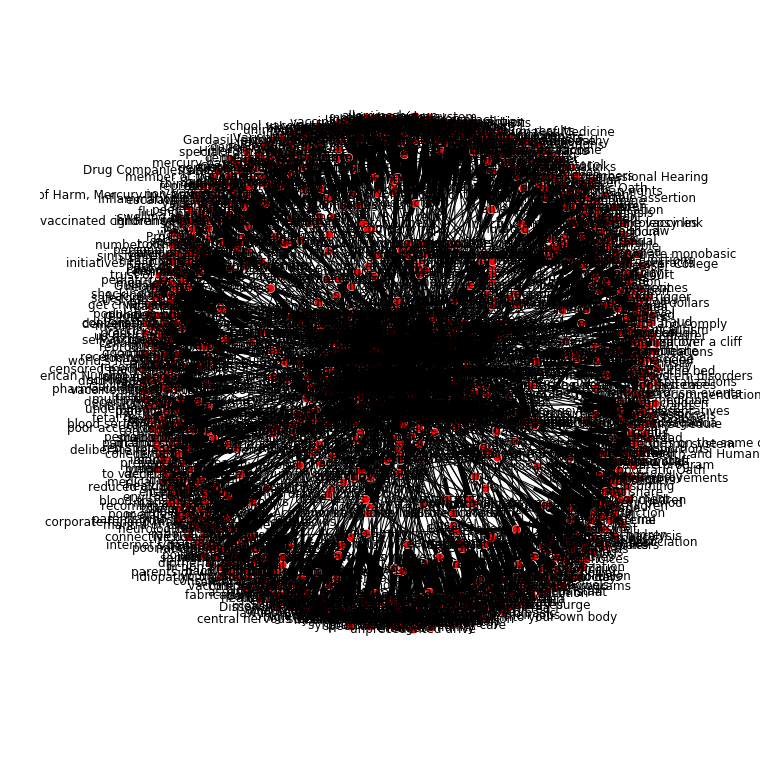

Drawing component of size 1140:


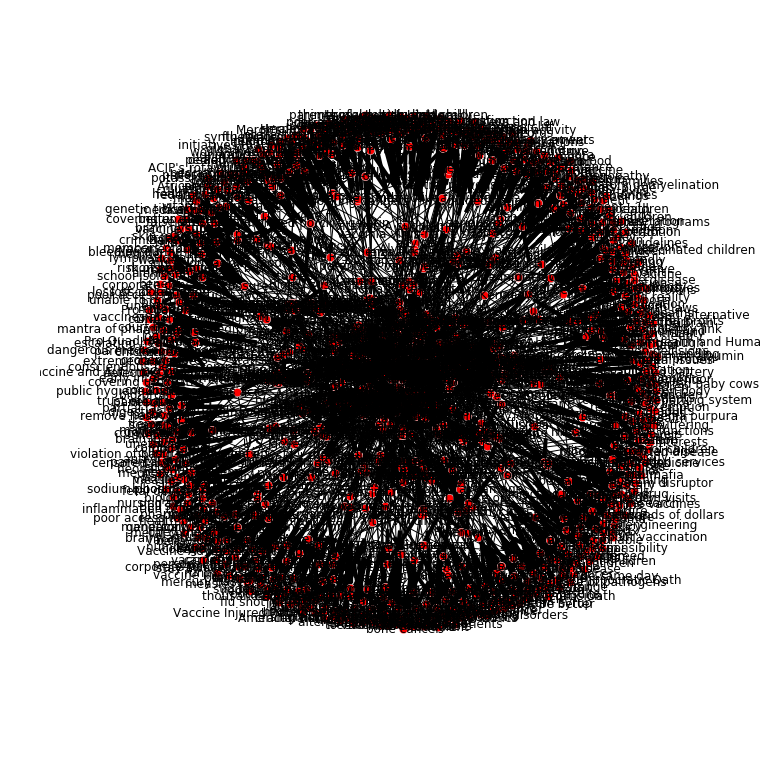

Drawing component of size 7:


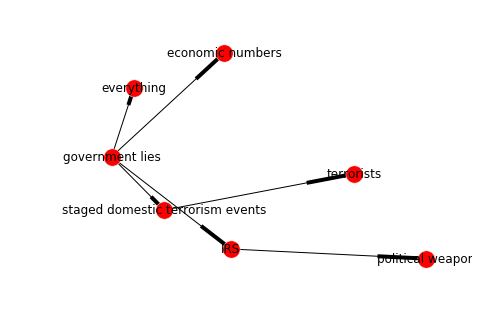

Drawing component of size 4:


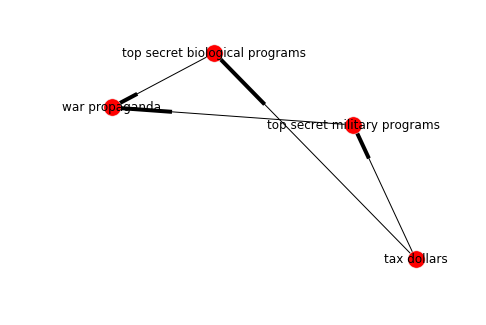

Drawing component of size 4:


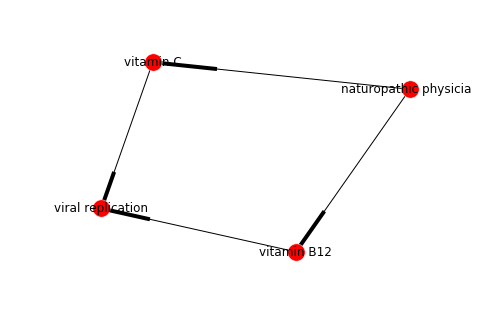

Drawing component of size 4:


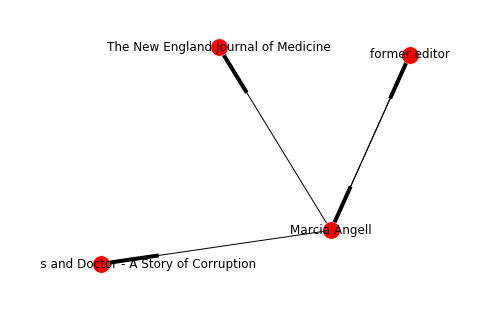

Drawing component of size 3:


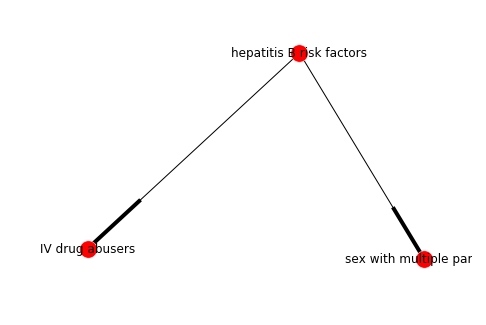

Drawing component of size 3:


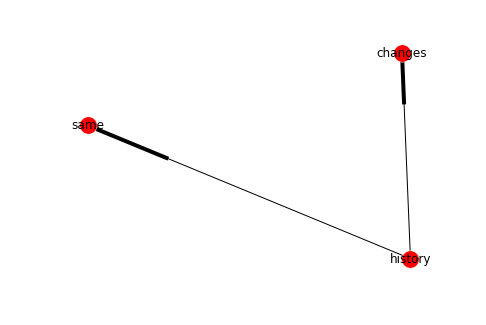

Drawing component of size 3:


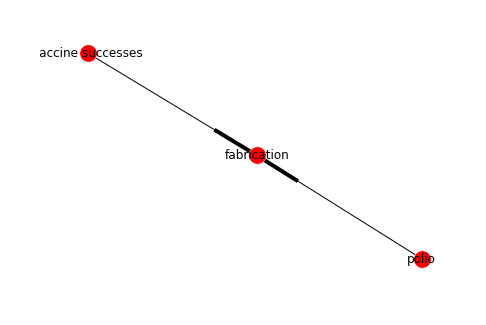

Drawing component of size 3:


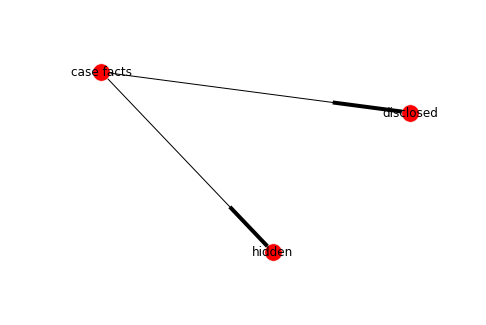

Drawing component of size 3:


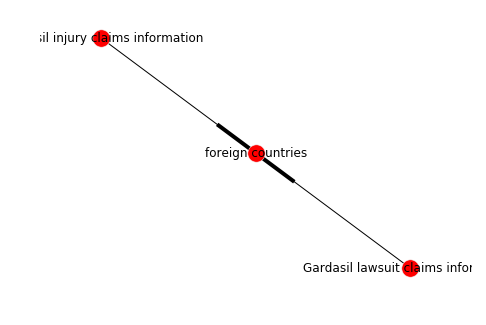

Drawing component of size 3:


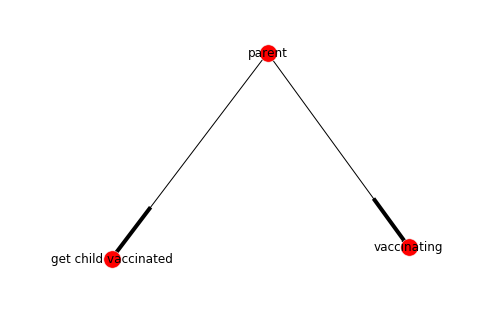

Drawing component of size 3:


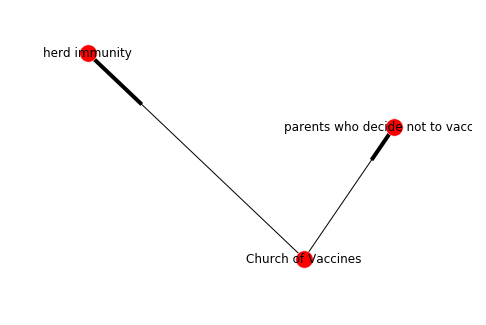

Drawing component of size 3:


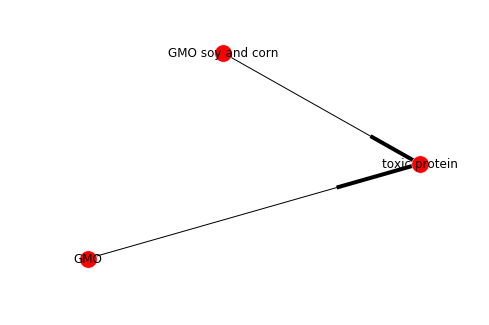

Drawing component of size 3:


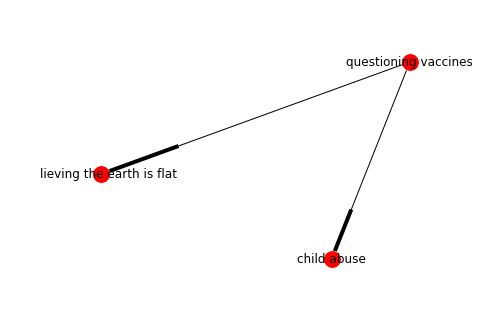

Drawing component of size 3:


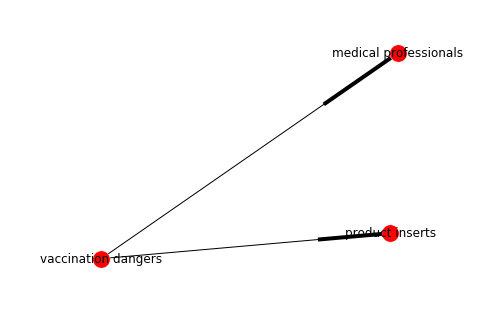

Drawing component of size 2:


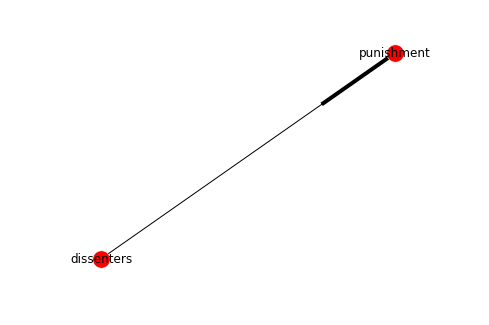

Drawing component of size 2:


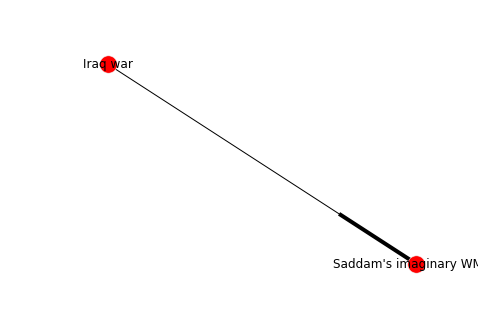

Drawing component of size 2:


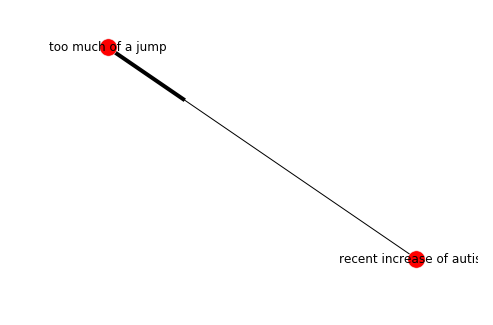

Drawing component of size 2:


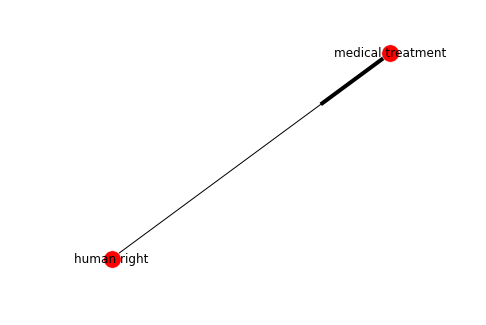

Drawing component of size 2:


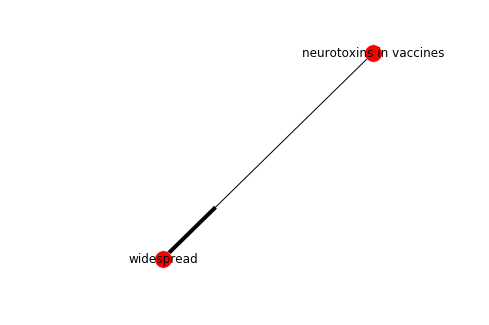

Drawing component of size 2:


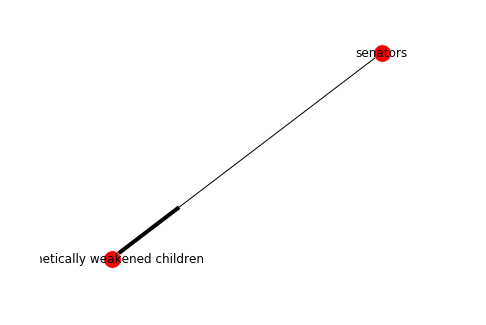

Drawing component of size 2:


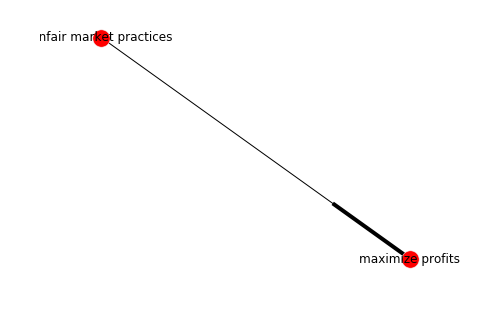

Drawing component of size 2:


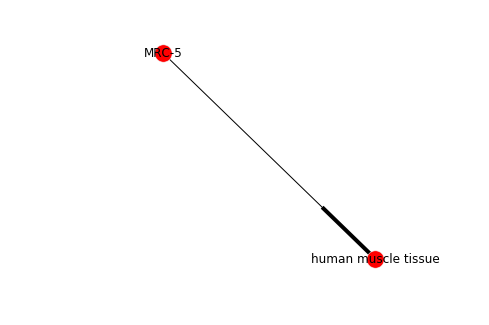

Drawing component of size 2:


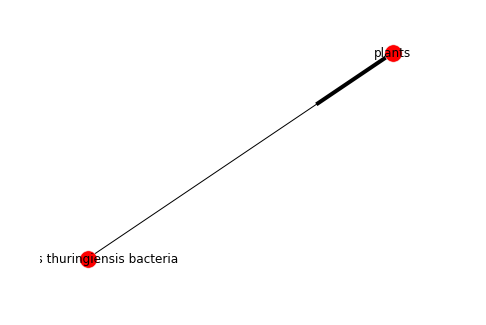

Drawing component of size 2:


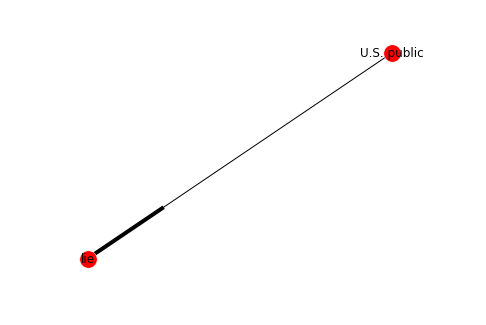

Drawing component of size 2:


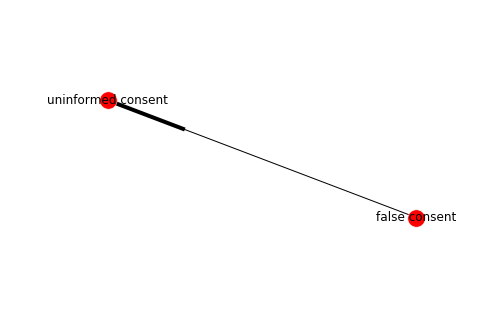

Drawing component of size 2:


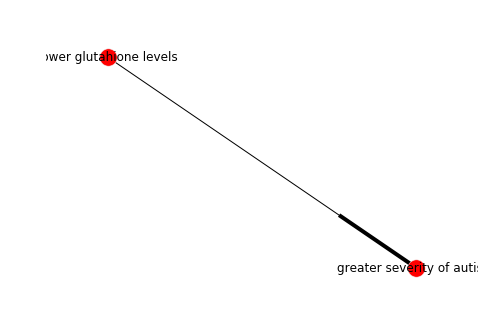

Drawing component of size 2:


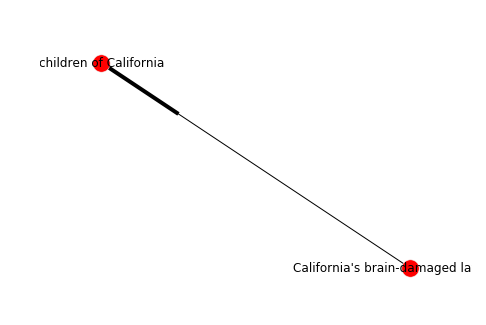

Drawing component of size 2:


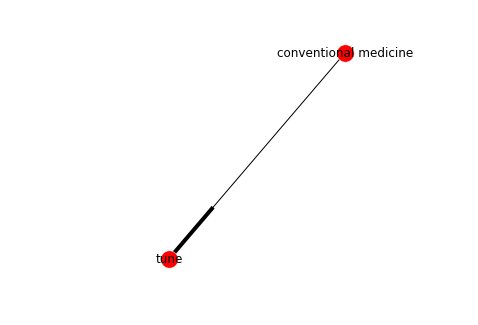

Drawing component of size 2:


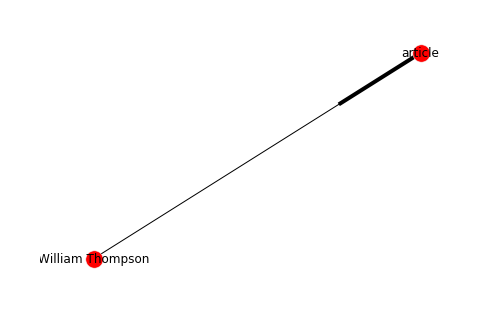

Drawing component of size 2:


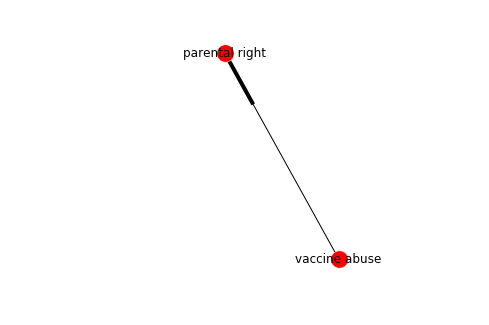

Drawing component of size 2:


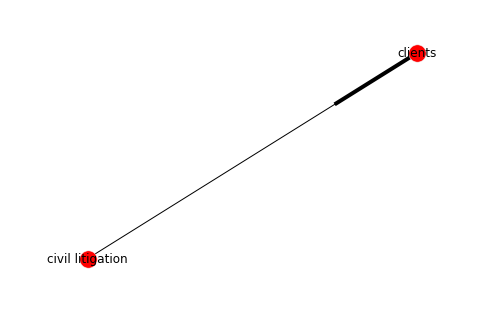

Drawing component of size 2:


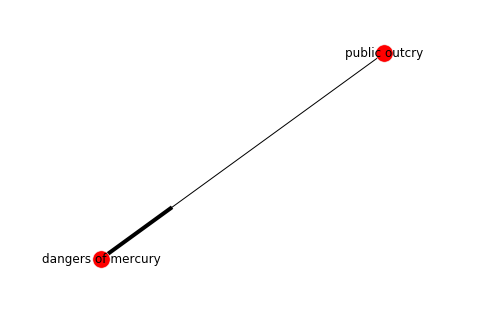

Drawing component of size 2:


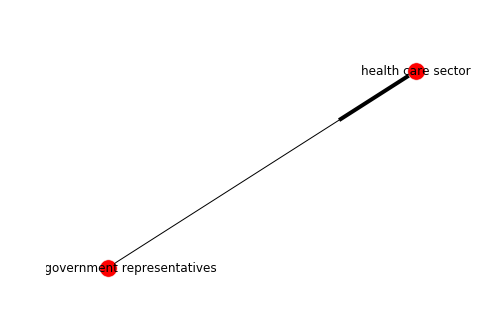

Drawing component of size 2:


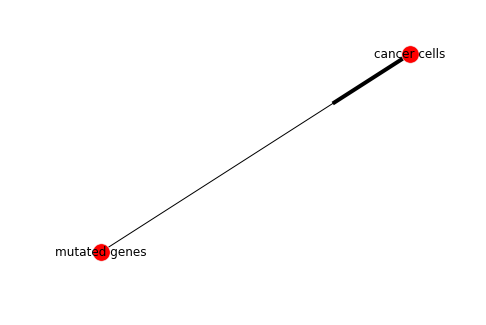

Drawing component of size 2:


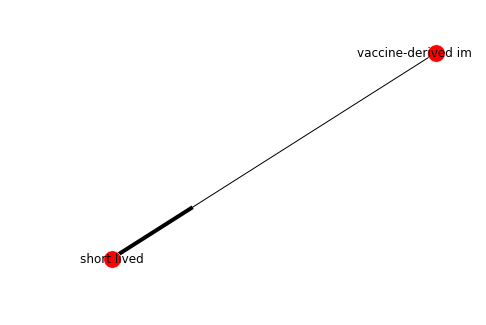

Drawing component of size 2:


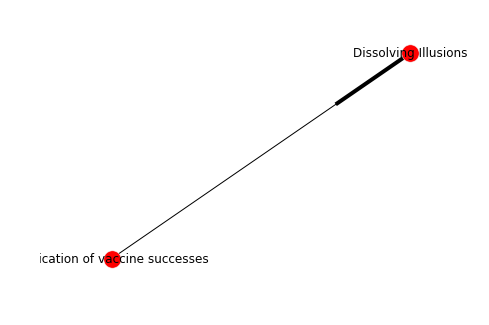

Drawing component of size 2:


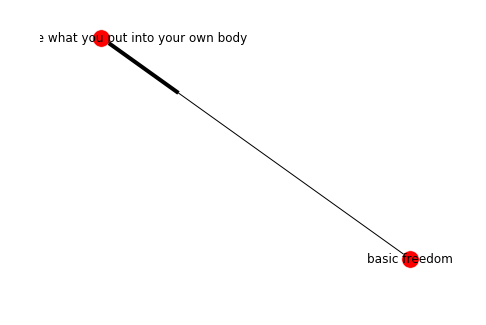

Drawing component of size 2:


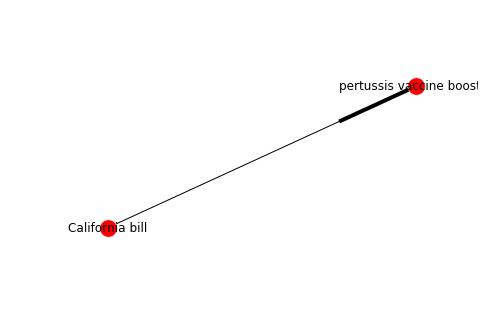

Drawing component of size 2:


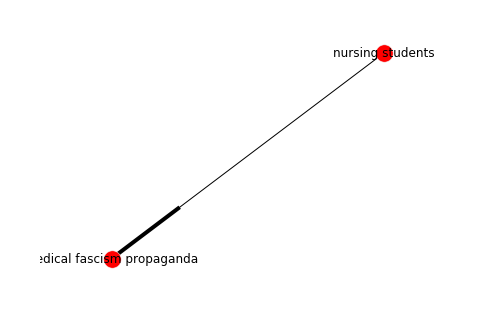

Drawing component of size 2:


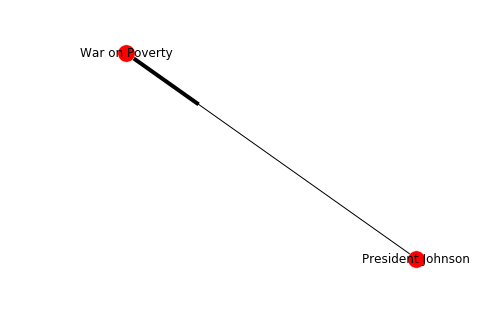

Drawing component of size 2:


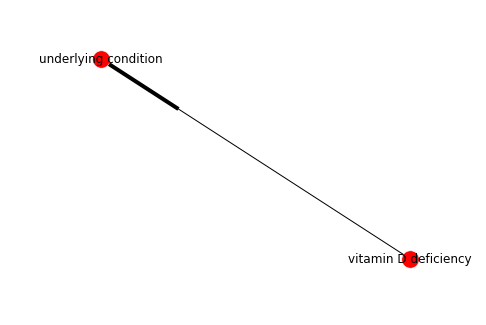

Drawing component of size 2:


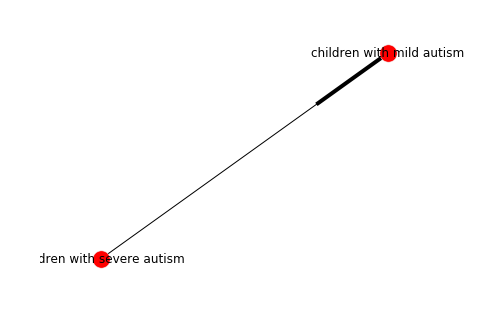

Drawing component of size 2:


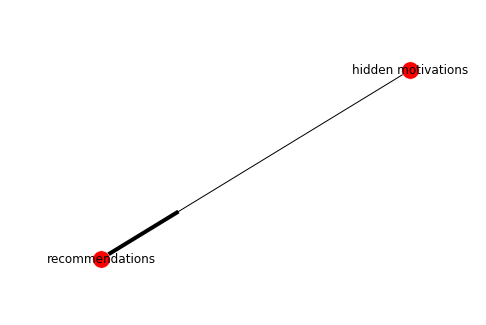

Drawing component of size 2:


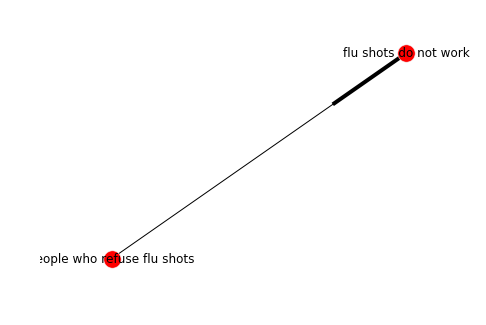

Drawing component of size 2:


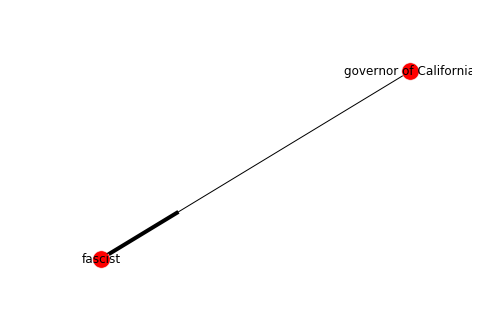

Drawing component of size 2:


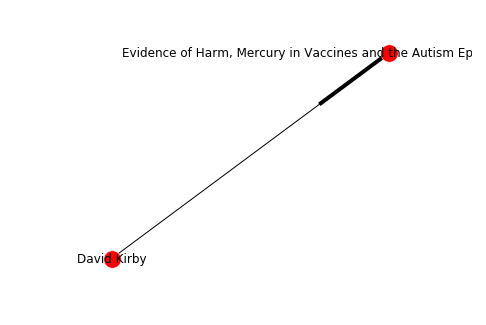

Drawing component of size 2:


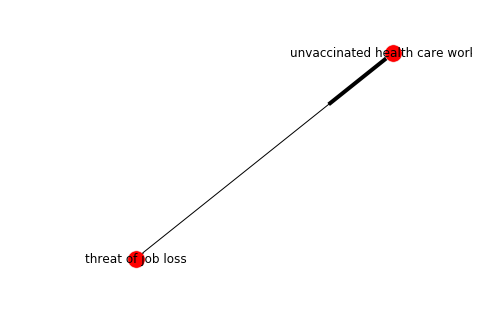

Drawing component of size 2:


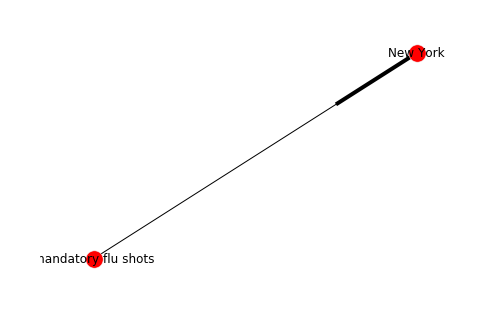

In [13]:
# DIRECTED network graph
describeGraph_d(dgraph)

## Undirected graph components

In [15]:
# list of connected components by size (undirected graph)
connected_components = [len(c) for c in sorted(nx.connected_components(ugraph), key=len, reverse=True)]

# generate connected components as subgraphs (undirected graph)
subgraphs = list(nx.connected_component_subgraphs(ugraph))

# greatest component (undirected MultiGraph)
u_Gc = max(nx.connected_component_subgraphs(ugraph), key=len)
u_Gc.name = "undirected Gc"

In [16]:
print "connected components = ", connected_components
print nx.info(u_Gc)

connected components =  [1140, 7, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Name: undirected Gc
Type: MultiGraph
Number of nodes: 1140
Number of edges: 1826
Average degree:   3.2035


## ~~Directed graph components~~

In [17]:
# use directed dgraph
components = sorted(nx.weakly_connected_components(dgraph), key = len, reverse = True)
cc = [len(c) for c in components]

# generate connected components as subgraphs 
subgraphs = list(nx.weakly_connected_component_subgraphs(dgraph))

# greatest component
d_Gc = max(nx.weakly_connected_component_subgraphs(dgraph), key=len)
d_Gc.name = "directed Gc"

In [18]:
print "connected components = ", cc
print nx.info(d_Gc)

connected components =  [1140, 7, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
Name: directed Gc
Type: MultiDiGraph
Number of nodes: 1140
Number of edges: 1826
Average in degree:   1.6018
Average out degree:   1.6018


# 5. Greatest component graph

In [19]:
# finally, greatest components for undirected and directed graphs
print nx.info(u_Gc)
print nx.info(d_Gc)

Name: undirected Gc
Type: MultiGraph
Number of nodes: 1140
Number of edges: 1826
Average degree:   3.2035
Name: directed Gc
Type: MultiDiGraph
Number of nodes: 1140
Number of edges: 1826
Average in degree:   1.6018
Average out degree:   1.6018


In [20]:
# save Gc
#nx.write_gml(u_Gc, "../output/network/u_Gc_negative.gml")
#nx.write_gml(d_Gc, "../output/network/d_Gc_negative.gml")

---
# ~~6. network stats for DIRECTED GC~~

In [ ]:
# load directed Gc
Gc_files = glob('../output/network/d_Gc_negative.gml')

network_data_columns = ['name',
                    'sentiment',
                    '# nodes',
                    '# edges',
                    #'avg deg',
                    'density',
                    'deg assort coef', 
                    'avg deg cent',
                    'avg bet cent',
                    'avg clo cent',
                    'high deg cent',
                    'high bet cent',
                    'high clo cent',
                    'avg node conn',
                    '# conn comp',
                    'gc size'
                    ]
network_data = pd.DataFrame(columns = network_data_columns)

In [ ]:
# Gc_files
for graph_num, gml_graph in enumerate(Gc_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    
    # calculate variables
    sent = "neg"
    nodes = nx.number_of_nodes(graph)
    edges = nx.number_of_edges(graph)
    density = float("{0:.4f}".format(nx.density(graph)))
    avg_deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
    avg_bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
    avg_clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
    #avg_deg = float("{0:.4f}".format(in_deg + out_deg))
    avg_node_con = float("{0:.4f}".format((nx.average_node_connectivity(graph))))
    deg_assort_coeff = float("{0:.4f}".format((nx.degree_assortativity_coefficient(graph))))
    conn_comp = nx.number_weakly_connected_components(graph) # ugraph
    deg_cen = nx.degree_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    clo_cen = nx.closeness_centrality(graph)
    highest_deg_cen = highest_centrality(deg_cen)
    highest_bet_cen = highest_centrality(bet_cen)
    highest_clo_cen = highest_centrality(clo_cen)
    Gc = len(max(nx.weakly_connected_component_subgraphs(graph), key=len))

    # save variables into list
    graph_values = {'name':filename,
                    'sentiment':sent,
                    '# nodes':nodes,
                    '# edges':edges,
                    #'avg deg':avg_deg,
                    'density':density,
                    'deg assort coef':deg_assort_coeff,
                    'avg deg cent':"%.4f" % avg_deg_cen,
                    'avg bet cent':"%.4f" % avg_bet_cen,
                    'avg clo cent':"%.4f" % avg_clo_cen,
                    'high deg cent':highest_deg_cen,
                    'high bet cent':highest_bet_cen,
                    'high clo cent':highest_clo_cen,
                    'avg node conn':avg_node_con,
                    '# conn comp':conn_comp,
                    'gc size':Gc
                    }
    network_data = network_data.append(graph_values, ignore_index=True)

In [ ]:
# print network data for greatest component
network_data

In [ ]:
# save
#network_data.to_csv('../output/df/d_Gc_neg.csv')

# 7. network stats for UNDIRECTED GC

In [21]:
# load UNdirected Gc
Gc_files = glob('../output/network/u_Gc_negative.gml')

network_data_columns = ['name',
                    'sentiment',
                    '# nodes',
                    '# edges',
                    #'avg deg',
                    'density',
                    'deg assort coef', 
                    'avg deg cent',
                    'avg bet cent',
                    'avg clo cent',
                    'high deg cent',
                    'high bet cent',
                    'high clo cent',
                    'avg node conn'
                    #'# conn comp',
                    #'gc size'
                    ]
network_data = pd.DataFrame(columns = network_data_columns)

In [22]:
# Gc_files
for graph_num, gml_graph in enumerate(Gc_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)
    
    # calculate variables
    sent = "neg"
    nodes = nx.number_of_nodes(graph)
    edges = nx.number_of_edges(graph)
    density = float("{0:.4f}".format(nx.density(graph)))
    avg_deg_cen = np.array(nx.degree_centrality(graph).values()).mean()
    avg_bet_cen = np.array(nx.betweenness_centrality(graph).values()).mean()
    avg_clo_cen = np.array(nx.closeness_centrality(graph).values()).mean()
    #avg_deg = float("{0:.4f}".format(in_deg + out_deg))
    avg_node_con = float("{0:.4f}".format((nx.average_node_connectivity(graph))))
    deg_assort_coeff = float("{0:.4f}".format((nx.degree_assortativity_coefficient(graph))))
    #conn_comp = nx.number_weakly_connected_components(graph) # ugraph
    deg_cen = nx.degree_centrality(graph)
    bet_cen = nx.betweenness_centrality(graph)
    clo_cen = nx.closeness_centrality(graph)
    highest_deg_cen = highest_centrality(deg_cen)
    highest_bet_cen = highest_centrality(bet_cen)
    highest_clo_cen = highest_centrality(clo_cen)
    #Gc = len(max(nx.weakly_connected_component_subgraphs(graph), key=len))

    # save variables into list
    graph_values = {'name':filename,
                    'sentiment':sent,
                    '# nodes':nodes,
                    '# edges':edges,
                    #'avg deg':avg_deg,
                    'density':density,
                    'deg assort coef':deg_assort_coeff,
                    'avg deg cent':"%.4f" % avg_deg_cen,
                    'avg bet cent':"%.4f" % avg_bet_cen,
                    'avg clo cent':"%.4f" % avg_clo_cen,
                    'high deg cent':highest_deg_cen,
                    'high bet cent':highest_bet_cen,
                    'high clo cent':highest_clo_cen,
                    'avg node conn':avg_node_con
                    #'# conn comp':conn_comp,
                    #'gc size':Gc
                    }
    network_data = network_data.append(graph_values, ignore_index=True)

----------
../output/network/u_Gc_negative.gml
Name: u_Gc_negative.gml
Type: MultiGraph
Number of nodes: 1140
Number of edges: 1826
Average degree:   3.2035


In [23]:
# print network data for greatest component
network_data

,name,sentiment,# nodes,# edges,density,deg assort coef,avg deg cent,avg bet cent,avg clo cent,high deg cent,high bet cent,high clo cent,avg node conn
0,u_Gc_negative.gml,neg,1140.0,1826.0,0.0028,-0.0195,0.0028,0.0033,0.2161,"(vaccines, 0.117647058824)","(vaccines, 0.328040065826)","(vaccines, 0.358176100629)",1.1835


In [24]:
# save
#network_data.to_csv('../output/df/u_Gc_neg.csv')

---
# Gc nodes table

In [25]:
#gml_files = glob('../output/network/d_Gc_negative.gml')
gml_files = glob('../output/network/u_Gc_negative.gml')

In [26]:
# 2_node_df: list all nodes and centrality
data_columns = ['name',
                'sentiment'
                ]
data = pd.DataFrame(columns = data_columns)
#combined_df = pd.DataFrame()

In [27]:
for graph_num, gml_graph in enumerate(gml_files):
    graph = nx.read_gml(gml_graph)
    (filepath, filename) = os.path.split(gml_graph)
    print('-' * 10)
    print(gml_graph)
    calculate_graph_inf(graph)

    # calculate variables and save into list
    sent = "neg"    
    deg_cent = nx.degree_centrality(graph)
    bet_cent = nx.betweenness_centrality(graph)
    clo_cent = nx.closeness_centrality(graph)
    graph_values = {'name':filename,
                    'sentiment':sent
                    }
    data = data.append(graph_values, ignore_index=True)

    degree = nx.degree(graph)
    deg_df = pd.DataFrame.from_dict(degree, orient = 'index')
    deg_df.columns = ['degree']
    # degree centrality
    deg_cent = nx.degree_centrality(graph)
    dc_df = pd.DataFrame.from_dict(deg_cent, orient = 'index')
    dc_df.columns = ['deg cent']
    # betweenness centrality
    bet_cent = nx.betweenness_centrality(graph)
    bc_df = pd.DataFrame.from_dict(bet_cent, orient = 'index')
    bc_df.columns = ['bet cent']
    # closeness centrality
    clo_cent = nx.closeness_centrality(graph)
    cc_df = pd.DataFrame.from_dict(clo_cent, orient = 'index')
    cc_df.columns = ['clo cent']
    # concat node frames into node_df
    frames = [deg_df, dc_df, bc_df, cc_df]
    node_df = pd.concat(frames, axis = 1)
    node_df.index.name = 'node'
    node_df = node_df.reset_index()

    values = pd.DataFrame(graph_values, columns = ('name', 'sentiment'), index = [0])
    
    # df = merges graph_values with node_df for single graph and fill NaNs
    df = pd.concat([values, node_df], axis = 1)
    df = df.fillna(method='ffill')
    #combined_df = combined_df.append(df)

----------
../output/network/u_Gc_negative.gml
Name: u_Gc_negative.gml
Type: MultiGraph
Number of nodes: 1140
Number of edges: 1826
Average degree:   3.2035


In [28]:
# print negative gc nodes
df

,name,sentiment,node,degree,deg cent,bet cent,clo cent
0,u_Gc_negative.gml,neg,ACIP,1,0.000878,0.000000,0.164691
1,u_Gc_negative.gml,neg,ACIP's rotavirus use recommendation,1,0.000878,0.000000,0.206753
2,u_Gc_negative.gml,neg,ADHD,1,0.000878,0.000000,0.252382
3,u_Gc_negative.gml,neg,AIDS,1,0.000878,0.000000,0.195604
4,u_Gc_negative.gml,neg,African American males,2,0.001756,0.000000,0.245845
5,u_Gc_negative.gml,neg,African women,3,0.002634,0.002625,0.265997
6,u_Gc_negative.gml,neg,African-American children,1,0.000878,0.000000,0.227937
7,u_Gc_negative.gml,neg,Alysia Osoff,6,0.005268,0.006272,0.210380
8,u_Gc_negative.gml,neg,America,2,0.001756,0.003509,0.183591
9,u_Gc_negative.gml,neg,American Academy of Pediatrics,2,0.001756,0.000550,0.258277


In [29]:
# save
##df.to_csv('../output/df/d_Gc_nodes_neg.csv')

#df.to_csv('../output/df/u_Gc_nodes_neg.csv')

---
# Cutsets

In [30]:
print "Greatest component size =", len(graph)

Greatest component size = 1140


In [31]:
# returns all minimum k cutsets of an undirected graph
# i.e., the set(s) of nodes of cardinality equal to the node connectivity of G
# thus if removed, would break G into two or more connected components

#cutsets = list(nx.all_node_cuts(graph))  # must be undirected

print "Greatest component size =", len(graph)
#print "# of cutsets =", len(cutsets)

# returns a set of nodes or edges of minimum cardinality that disconnects G
min_ncut = nx.minimum_node_cut(graph)
min_ecut = nx.minimum_edge_cut(graph)

print "Min node cut =", min_ncut
print "Min edge cut =", min_ecut

# min cuts with source and target
print nx.minimum_node_cut(graph, s='vaccines', t='autism')
print nx.minimum_edge_cut(graph, s='vaccines', t='autism')

Greatest component size = 1140
Min node cut = set([u'genetic predisposition'])
Min edge cut = set([(u'influenza', u'childhood diseases')])
set([u'mercury', u'Vaccine Injury Compensation Program', u'toxic chemical ingredients', u'vaccine safety', u"alzheimer's", u'measles', u'CDC whistleblower', u'CDC', u'vaccine-injured children', u'public', u'vaccination', u'rates', u'encephalopathy', u'thimerosal', u'MMR', u'studies', u'children', u'hepatitis B vaccine'])
set([(u'hepatitis B vaccine', u'autism'), (u'thimerosal', u'autism'), (u'public', u'autism'), (u'toxic chemical ingredients', u'autism'), (u'vaccine-injured children', u'autism'), (u'rates', u'autism'), (u'MMR', u'autism'), (u'CDC whistleblower', u'autism'), (u'vaccine safety', u'autism'), (u'Vaccine Injury Compensation Program', u'autism'), (u'newborn boys', u'autism'), (u'encephalopathy', u'autism'), (u'vaccines', u'autism'), (u'preservative', u'autism'), (u'link', u'autism'), (u'measles', u'autism'), (u'vaccination', u'autism'), 

In [32]:
# read edge labels in min cut for Gc
# change source and target
a = nx.minimum_edge_cut(graph, s='vaccines', t='autism')
#a = nx.minimum_edge_cut(graph)

labels = nx.get_edge_attributes(graph,'edge')
edgelabels = {}
for e in labels.keys():
    e1 = e[0:2]
    edgelabels[e1]=labels[e]

for e in a:
    if edgelabels.has_key(e):
        print e,edgelabels[e]
    else:
        rev_e = e[::-1]
        print rev_e, edgelabels[rev_e]

(u'hepatitis B vaccine', u'autism') giving to newborn baby boys more than triples their risk of developing
(u'thimerosal', u'autism') was directly caused by
(u'public', u'autism') wonders why they have
(u'toxic chemical ingredients', u'autism') may be significant contributing factor to
(u'autism', u'vaccine-injured children') often revealed to have
(u'rates', u'autism') in U.K is 1 in 83
(u'MMR', u'autism') only one studied in association with
(u'CDC whistleblower', u'autism') admitting vaccines are linked to
(u'vaccine safety', u'autism') questionable in relation to
(u'Vaccine Injury Compensation Program', u'autism') found in two kids after being vaccinated awarded by
(u'newborn boys', u'autism') more than tripled their risk of developing
(u'encephalopathy', u'autism') caused by vaccines produces a permanent injury and creates symptoms of
(u'vaccines', u'autism') caused
(u'preservative', u'autism') in vaccine causes
(u'autism', u'link') existing between vaccines and
(u'measles', u'aut

- - -

# full network node centrality

In [33]:
# make sure you're using the right graph
print "gml_files = ", gml_files
print "gml_graph = ", gml_graph

gml_files =  ['../output/network/u_Gc_negative.gml']
gml_graph =  ../output/network/u_Gc_negative.gml


In [34]:
# FULL UNDIRECTED
graph = nx.read_gml('../output/network/u_neg.gml')  

## graph = nx.read_gml('../output/network/article_neg1.gml')  # full network directed

print nx.info(graph)

Name: article_neg1.gml
Type: MultiGraph
Number of nodes: 1257
Number of edges: 1898
Average degree:   3.0199


In [35]:
# degree centrality
dc = nx.degree_centrality(graph)
dc_df = pd.DataFrame.from_dict(dc, orient = 'index')
dc_df.columns = ['degree cent']
dc_df = dc_df.sort_values(by = ['degree cent'])
#dc_df

# betweenness centrality
bc = nx.betweenness_centrality(graph)
bc_df = pd.DataFrame.from_dict(bc, orient = 'index')
bc_df.columns = ['betweenness cent']
bc_df = bc_df.sort_values(by = ['betweenness cent'])
#bc_df

# closeness centrality
cc = nx.closeness_centrality(graph)
cc_df = pd.DataFrame.from_dict(cc, orient = 'index')
cc_df.columns = ['closeness cent']
cc_df = cc_df.sort_values(by = ['closeness cent'])
#cc_df

In [36]:
dc_df

,degree cent
state,0.000796
Italian descent,0.000796
omitting deaths,0.000796
gene products,0.000796
variant genotypes,0.000796
nobody,0.000796
lupus,0.000796
demand for justice,0.000796
corporate-funded make-believe science tabloids,0.000796
pediatrics instructor,0.000796


In [37]:
bc_df

,betweenness cent
marketing vaccines to children,0.000000
great records,0.000000
compensation,0.000000
self-insurance policy,0.000000
First do no harm,0.000000
herd immunity,0.000000
Pandemrix-narcolepsy link,0.000000
troubling,0.000000
eye pain,0.000000
U.S. public,0.000000


In [38]:
cc_df

,closeness cent
short lived,0.000796
false consent,0.000796
parental right,0.000796
human right,0.000796
recent increase of autism,0.000796
War on Poverty,0.000796
California's brain-damaged lawmakers,0.000796
unvaccinated health care workers,0.000796
medical treatment,0.000796
cancer cells,0.000796


# Gc node centrality

In [39]:
# GC undirected
graph = nx.read_gml('../output/network/u_Gc_negative.gml')  

## graph = nx.read_gml('../output/network/d_Gc_negative.gml')  # gc directed

print nx.info(graph)

Name: undirected Gc
Type: MultiGraph
Number of nodes: 1140
Number of edges: 1826
Average degree:   3.2035


In [40]:
# degree centrality
dc = nx.degree_centrality(graph)
dc_df = pd.DataFrame.from_dict(dc, orient = 'index')
dc_df.columns = ['degree cent']
dc_df = dc_df.sort_values(by = ['degree cent'])
#dc_df

# betweenness centrality
bc = nx.betweenness_centrality(graph)
bc_df = pd.DataFrame.from_dict(bc, orient = 'index')
bc_df.columns = ['betweenness cent']
bc_df = bc_df.sort_values(by = ['betweenness cent'])
#bc_df

# closeness centrality
cc = nx.closeness_centrality(graph)
cc_df = pd.DataFrame.from_dict(cc, orient = 'index')
cc_df.columns = ['closeness cent']
cc_df = cc_df.sort_values(by = ['closeness cent'])
#cc_df

In [42]:
dc_df

,degree cent
troubling data,0.000878
toxic heavy metal,0.000878
special education services,0.000878
vaccine adverse reactions,0.000878
statistical links,0.000878
big profit centers,0.000878
top health officials,0.000878
human carcinogen,0.000878
surveys,0.000878
generous,0.000878


In [43]:
bc_df

,betweenness cent
troubling data,0.000000
pock formation,0.000000
Tween 80,0.000000
industry,0.000000
The Vaccine and Autism Congressional Hearing,0.000000
vaccine injury settlement,0.000000
young adults,0.000000
endangered children,0.000000
Guillain-Barre syndrome,0.000000
Kennedy's death,0.000000


In [44]:
cc_df

,closeness cent
respiratory system,0.107850
digestive tract,0.107850
injecting any substance,0.120874
lavish gifts,0.121831
extensive medication,0.126471
endangered children,0.128934
stay awake during the school day,0.132611
revisionist stance,0.133497
radicalism,0.134348
truth seekers,0.134522
